In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

# 데이터 불러오기 (count17)
2017_운영시간내_실이용객_시각별_주차장_카운트.csv

In [2]:
count17 = pd.read_csv('./data/2017_운영시간내_실이용객_시각별_주차장_카운트.csv')

In [3]:
count17['datetime'] = pd.to_datetime(count17['datetime'])

In [4]:
count17

,datetime,count
0,2017-01-01 00:00:00,0.0
1,2017-01-01 01:00:00,0.0
2,2017-01-01 02:00:00,0.0
3,2017-01-01 03:00:00,0.0
4,2017-01-01 04:00:00,0.0
...,...,...
8756,2017-12-31 20:00:00,224.0
8757,2017-12-31 21:00:00,216.0
8758,2017-12-31 22:00:00,25.0
8759,2017-12-31 23:00:00,0.0


# 데이터 불러오기 (count18)
2018_운영시간내_실이용객_시각별_주차장_카운트.csv

In [5]:
count18 = pd.read_csv('./data/2018_운영시간내_실이용객_시각별_주차장_카운트.csv')

In [6]:
count18['datetime'] = pd.to_datetime(count18['datetime'])

In [7]:
count18

,datetime,count
0,2018-01-01 00:00:00,0.0
1,2018-01-01 01:00:00,0.0
2,2018-01-01 02:00:00,0.0
3,2018-01-01 03:00:00,0.0
4,2018-01-01 04:00:00,0.0
...,...,...
740,2018-01-31 20:00:00,60.0
741,2018-01-31 21:00:00,38.0
742,2018-01-31 22:00:00,7.0
743,2018-01-31 23:00:00,0.0


## ACF

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

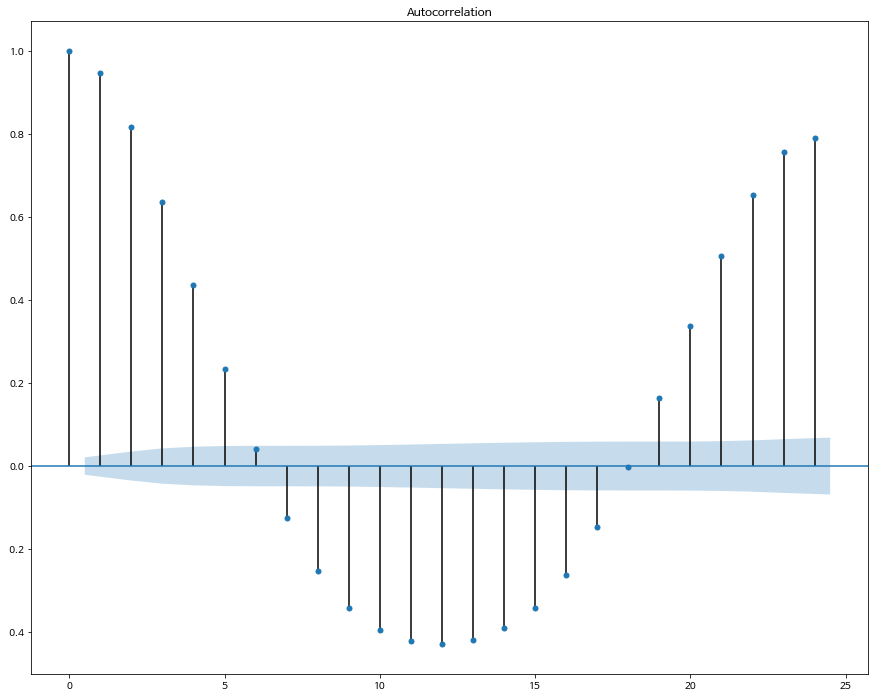

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

fig = plot_acf(count17['count'], lags=24, ax=ax) # 24시간 AFC

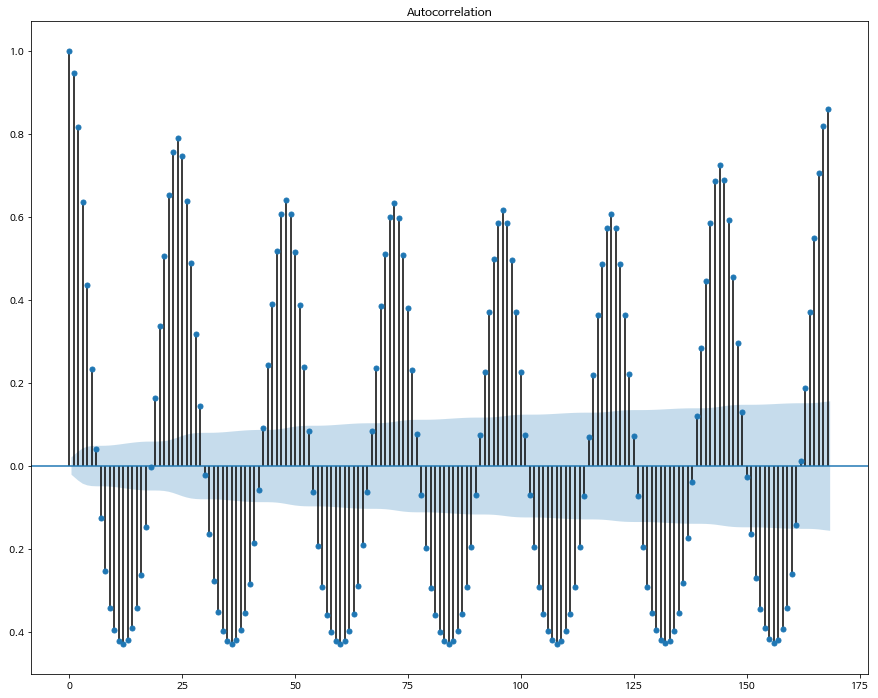

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

fig = plot_acf(count17['count'], lags=24*7, ax=ax) # 24시간 * 7일 AFC

# negative한 상관이 있는 비정상 같은데?

## PACF

Partial ACF, 추세 제거.

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

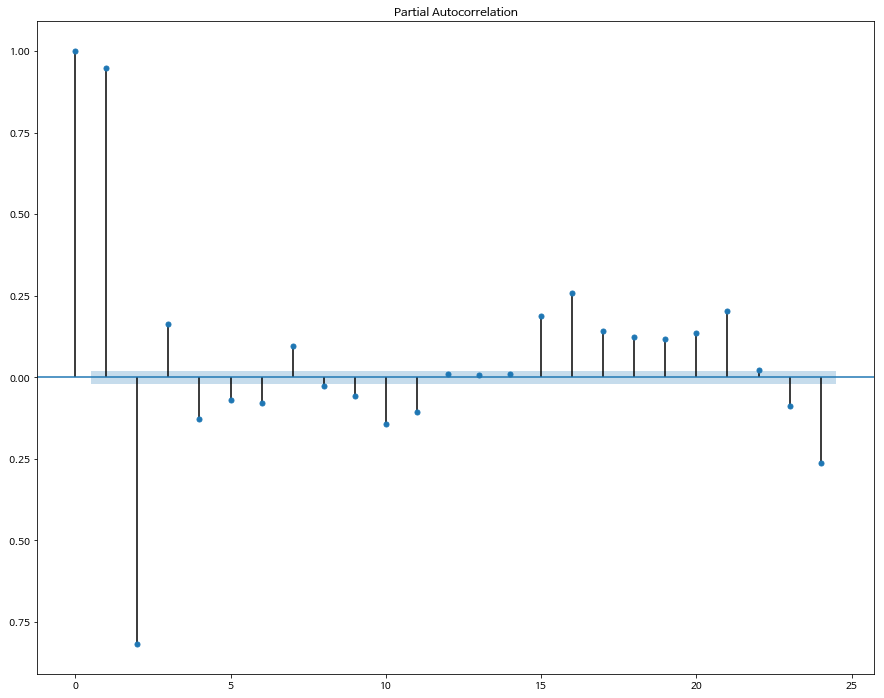

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

fig = plot_pacf(count17['count'], lags=24, ax=ax) # 24시간 PAFC

# 이건 해석을 어떻게 해야하는걸까요...

## 정상성 검정 Augmented Dickey-Fuller Test
* p < .05 정상

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(count17['count'])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # 비정상

ADF Statistic: -11.091014136586647
p-value: 4.0821646617770227e-20


## 로그 변환과 차분

In [15]:
counts = count17['count'].values
counts = np.log(counts)
# print(counts[:50])
# counts = pd.Series([0 if c < 0 else c for c in counts])
# print(counts[:50])
counts

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



array([      -inf,       -inf,       -inf, ..., 3.21887582,       -inf,
             -inf])

In [16]:
counts[1:][-5:]

array([5.41164605, 5.37527841, 3.21887582,       -inf,       -inf])

In [17]:
counts[:-1][-5:]

array([5.42934563, 5.41164605, 5.37527841, 3.21887582,       -inf])

In [18]:
counts[1:][-5:] - counts[:-1][-5:]

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in subtract



array([-0.01769958, -0.03636764, -2.15640258,        -inf,         nan])

In [19]:
diff = counts[1:] - counts[:-1]
diff[:50]

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in subtract



array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         inf,  1.72474876,
        0.54393478,  0.39777276,  0.27505442,  0.17693071,  0.07340572,
       -0.29225874, -0.42866801, -1.04380405, -1.27296568, -0.27193372,
       -0.06453852, -2.01490302,        -inf,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         inf,  1.15496523,  0.39167179,
        0.26662866,  0.11383514,  0.09069656,  0.09373248, -0.31977039,
       -0.37337679, -0.19716806, -0.18232156, -0.26236426, -0.4780358 ,
       -1.82454929,        -inf,         nan,         nan,         nan])

/home/leebom/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



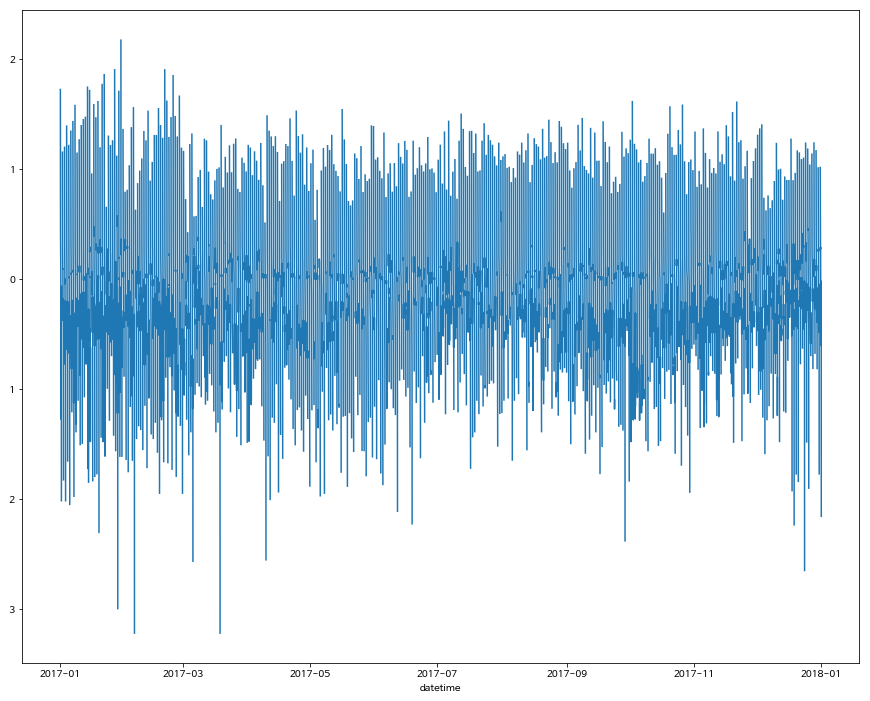

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

sns.lineplot(
    x = count17.iloc[1:, 0],
    y = diff)

In [21]:
log_counts = count17[1:].copy()
len(log_counts)

8760

In [22]:
len(diff)

8760

In [23]:
log_counts['count'] = diff
log_counts['count'] = log_counts['count'].fillna(0)
log_counts.loc[log_counts['count'] < -2000, 'count'] = 0  # -inf 값 처리
log_counts.loc[log_counts['count'] > 2000, 'count'] = 0  # inf 값 처리

In [24]:
log_counts['count'].describe()

count    8760.000000
mean       -0.056798
std         0.427313
min        -3.218876
25%        -0.138063
50%         0.000000
75%         0.000000
max         2.173968
Name: count, dtype: float64

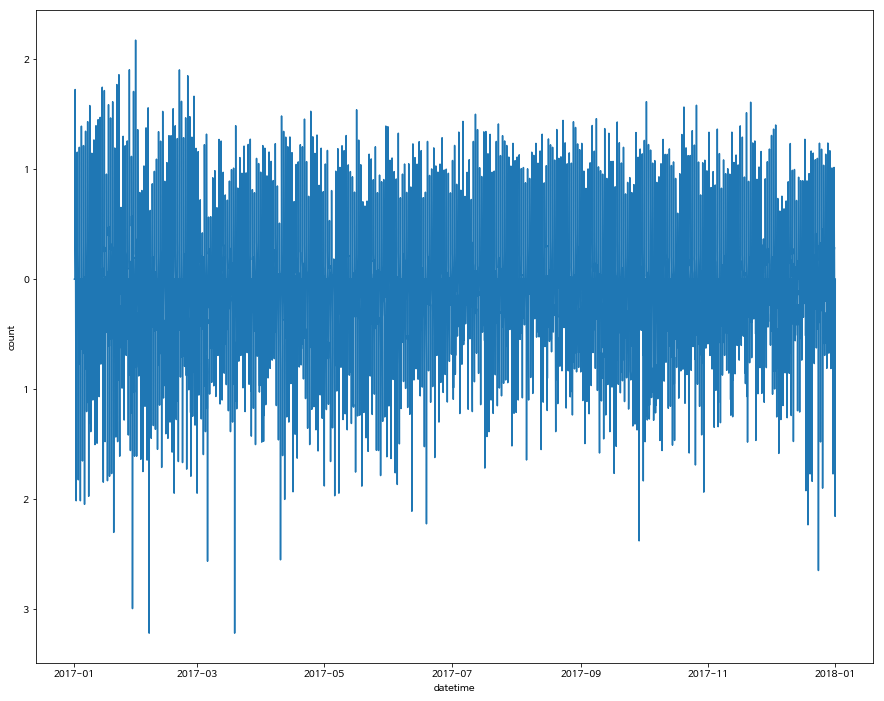

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

sns.lineplot(
    x = count17.iloc[1:, 0],
    y = log_counts['count'],
    ax = ax)

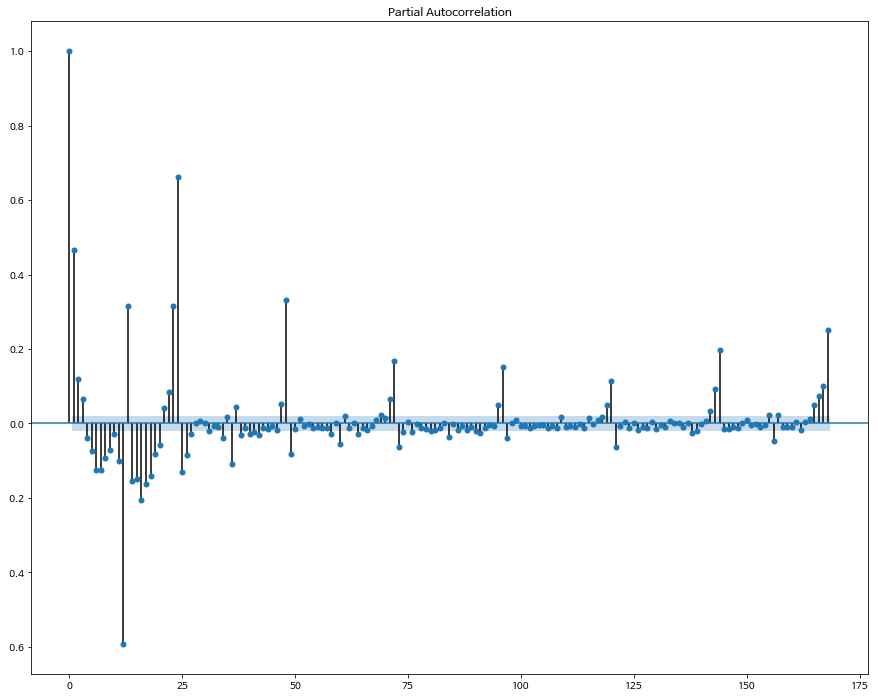

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

fig = plot_pacf(log_counts['count'], lags=24*7, ax=ax)

In [27]:
result = adfuller(log_counts['count'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic: -13.078311937947921
p-value: 1.8937487486687885e-24
